## Desafio_1

Agora vamos praticas tudo o que aprendemos no módulo 1 utilizando dados reais do CAGED (Cadastro Geral de Empregados e Desempregados)

<br>
<img src="img/caged.png" width='1200' >
<br>

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT).

É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Este Cadastro serve, ainda, como base para a elaboração de estudos, pesquisas, projetos e programas ligados ao mercado de trabalho, ao mesmo tempo em que subsidia a tomada de decisões para ações governamentais.

Visite o sitee do CAGED através [deste link](http://trabalho.gov.br/trabalhador-caged/2015-09-10-17-46-22) e acesse os dados clicando inicialemente em **ESTATÍSTICA** e depois em **MICRODADOS**, então acesse a base de dados do CAGED e baixe o último arquivo do ano de 2018 **CAGEDEST_122018.7z**. Além disso, baize também o arquivo **CAGEDEST_layout_Atualizado.xls** para o dicionário de dados.

Após isso, podemos começar as nossas análises:

1. **Importar as bibliotecas** e ler os dados: Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.

2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

4. Verificação dos dados da variável **Grau de Instrução**: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

7. Elaborar uma hipótese para ser rejeitada ou não-rejeitada por você de acordo com o resultado da sua análise, através da utilização dos dados do CAJED considerando as suas colunas.

8. Avançado: plote um SEABORN heatmap com **todas as correlações das variávies numéricas entre si**. 

9. Avançado: Plote uma **regressão múltipla**.


In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'../99 Datasets/CAGEDEST_122018.txt', delimiter=';', encoding='ISO-8859-1')

In [3]:
df.shape

(2256752, 42)

In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Columns: 42 entries, Admitidos/Desligados to Ind Trab Intermitente
dtypes: int64(27), object(15)
memory usage: 723.1+ MB


In [5]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 42 columns):
Admitidos/Desligados     2256752 non-null int64
Competência Declarada    2256752 non-null int64
Município                2256752 non-null int64
Ano Declarado            2256752 non-null int64
CBO 2002 Ocupação        2256752 non-null int64
CNAE 1.0 Classe          2256752 non-null int64
CNAE 2.0 Classe          2256752 non-null int64
CNAE 2.0 Subclas         2256752 non-null int64
Faixa Empr Início Jan    2256752 non-null int64
Grau Instrução           2256752 non-null int64
Qtd Hora Contrat         2256752 non-null int64
IBGE Subsetor            2256752 non-null int64
Idade                    2256752 non-null int64
Ind Aprendiz             2256752 non-null int64
Ind Portador Defic       2256752 non-null int64
Raça Cor                 2256752 non-null int64
Salário Mensal           2256752 non-null object
Saldo Mov                2256752 non-null int64
Sexo                  

In [6]:
df.head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,...,999,{ñ,99,999,99,{ñ,999,99,0,0
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1


In [7]:
df.tail()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
2256747,2,201812,221100,2018,252405,91995,94308,9430800,5,9,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256748,2,201812,221100,2018,514120,91995,94308,9430800,6,7,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256749,2,201812,221100,2018,422110,85138,86305,8630503,1,7,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256750,2,201812,221100,2018,422315,66303,65502,6550200,6,8,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256751,2,201812,220770,2018,231105,80144,85121,8512100,5,9,...,999,{ñ,99,999,99,{ñ,999,99,0,0


In [8]:
df.describe(exclude=['object'])

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Sexo,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Regiões Adm DF,Mesorregião,Microrregião,Ind Trab Parcial,Ind Trab Intermitente
count,2.256752e+06,2256752.0,2.256752e+06,2256752.0,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,...,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06
mean,1.574103e+00,201812.0,3.553863e+05,2018.0,5.368213e+05,5.304958e+04,5.126839e+04,5.126847e+06,4.303066e+00,6.595547e+00,...,1.413703e+00,1.084850e+00,1.553693e-02,6.216255e+00,3.534381e+01,7.773592e-01,3.540988e+03,3.537022e+04,4.852106e-03,5.339089e-03
std,4.944784e-01,0.0,8.300073e+04,0.0,1.784826e+05,2.269392e+04,2.468035e+04,2.468034e+06,2.646710e+00,1.548538e+00,...,4.924966e-01,4.031142e-01,2.154446e-01,9.922202e+00,8.311311e+00,8.125151e+01,8.309257e+02,8.310356e+03,6.948788e-02,7.287376e-02
min,1.000000e+00,201812.0,1.100010e+05,2018.0,3.011000e+04,1.112000e+03,1.113000e+03,1.113010e+05,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.101000e+03,1.100100e+04,0.000000e+00,0.000000e+00
25%,1.000000e+00,201812.0,3.147000e+05,2018.0,4.141050e+05,4.525000e+04,4.213800e+04,4.213800e+06,2.000000e+00,6.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,3.100000e+01,0.000000e+00,3.108000e+03,3.103900e+04,0.000000e+00,0.000000e+00
50%,2.000000e+00,201812.0,3.531500e+05,2018.0,5.174100e+05,5.241800e+04,4.773300e+04,4.773300e+06,4.000000e+00,7.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,3.500000e+01,0.000000e+00,3.512000e+03,3.504600e+04,0.000000e+00,0.000000e+00
75%,2.000000e+00,201812.0,4.117900e+05,2018.0,7.152100e+05,7.412800e+04,7.490100e+04,7.490102e+06,6.000000e+00,7.000000e+00,...,2.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,4.100000e+01,0.000000e+00,4.110000e+03,4.103700e+04,0.000000e+00,0.000000e+00
max,2.000000e+00,201812.0,5.300100e+05,2018.0,9.922250e+05,9.900700e+04,9.900800e+04,9.900800e+06,9.000000e+00,9.000000e+00,...,2.000000e+00,3.000000e+00,6.000000e+00,9.000000e+01,5.300000e+01,9.999000e+03,5.301000e+03,5.300100e+04,1.000000e+00,1.000000e+00


In [9]:
df['Salário Mensal'].value_counts(dropna=False).nlargest(10)

#top -> R$ 954,00 (valor de um salário mínimo em 2018)
#valor R 0,00 -> aparece em grande quantidade -> analisar se ocorre para desempregados apenas

000954,00    95704
001500,00    24390
001200,00    24382
000000,00    24245
001050,00    18745
001300,00    17894
001110,00    17597
001108,00    16460
001000,00    15681
000477,00    15585
Name: Salário Mensal, dtype: int64

In [10]:
df['Salário Mensal'].describe()

# dtype -> object -> necessário transformar para número

count       2256752
unique        16987
top       000954,00
freq          95704
Name: Salário Mensal, dtype: object

In [11]:
type(df['Salário Mensal'])

pandas.core.series.Series

In [12]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html
# Series.str.replace(self, pat, repl, n=-1, case=None, flags=0, regex=True

df['Salário Mensal'] = df['Salário Mensal'].str.replace(',','.')

In [13]:
df['Salário Mensal'] = df['Salário Mensal'].astype(float)

In [14]:
df['Salário Mensal'].head()

0     954.0
1    2500.0
2       0.0
3       0.0
4       0.0
Name: Salário Mensal, dtype: float64

In [15]:
salario0 = (df['Salário Mensal'] == 0.0)

In [16]:
df['Salário Mensal'][salario0].head()

2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: Salário Mensal, dtype: float64

In [17]:
df[salario0].tail()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
2255433,2,201812,221100,2018,371410,74993,82300,8230001,3,7,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256595,2,201812,221100,2018,519110,55220,56112,5611203,4,7,...,999,{ñ,99,999,99,{ñ,999,99,1,0
2256609,2,201812,221100,2018,421125,71404,77292,7729202,2,7,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256661,2,201812,221100,2018,233210,63304,79121,7912100,2,7,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256689,2,201812,221100,2018,231210,80152,85139,8513900,4,9,...,999,{ñ,99,999,99,{ñ,999,99,1,0


In [18]:
df[salario0]['Admitidos/Desligados'].value_counts()

# O resultado mostra que foram admitidos 8426, porém a coluna salário está com o valor 0,00 para estes casos.
# ADMISSAO: 1
# DESLIGAMENTO: 2

2    15819
1     8426
Name: Admitidos/Desligados, dtype: int64

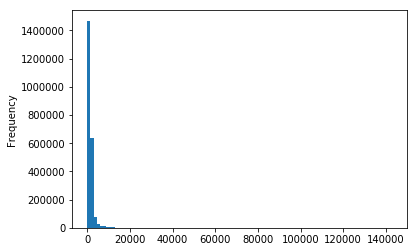

In [19]:
%matplotlib inline 

df['Salário Mensal'].plot.hist(bins=100,)

# Pelo gráfico a maioria ganha salário menor do que R$ 20.000 (ou até menos)

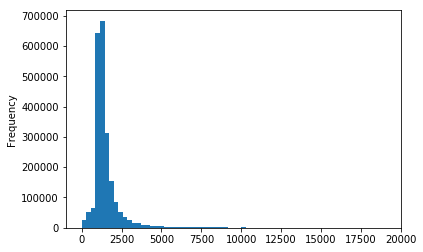

In [20]:
df['Salário Mensal'].plot.hist(bins=500, xlim=(-1000, 20000))

# Gerando novo gráfico limitando o range para ter uma melhor visualização dos valores de salário abaixo de R$ 20.000
# vemos que a maioria fica abaxio de R$ 2.500,00, com um pico entre 0 e 2.500.

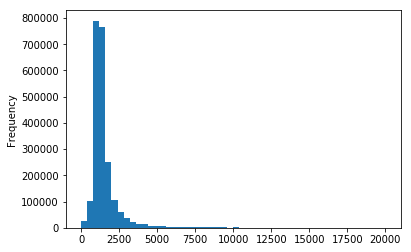

In [21]:
# Outra forma seria criar uma máscara para eliminar os valores extremos ou outliers
mascara_valores_extremos = (df['Salário Mensal'] < 20000.00)

df['Salário Mensal'][mascara_valores_extremos].plot.hist(bins=50, range=(0,20000))

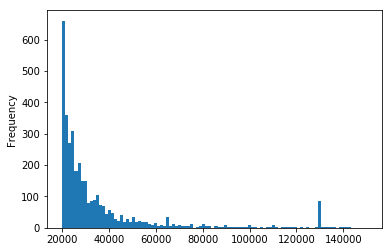

In [22]:
# Criando uma máscar para mostrar os salários maiores que R$ 20.000,00
mascara_show_outliers = (df['Salário Mensal'] >= 20000.00)

df['Salário Mensal'][mascara_show_outliers].plot.hist(bins=100, range=(20000,150000))

In [23]:
df['Salário Mensal'][mascara_show_outliers].value_counts().nlargest(10)

20000.0     112
130487.0     83
20745.0      80
25000.0      56
22000.0      53
30000.0      42
24000.0      32
21000.0      31
35000.0      27
65240.0      26
Name: Salário Mensal, dtype: int64

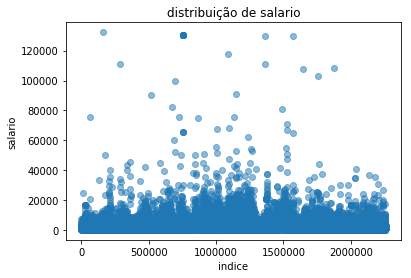

In [24]:
import matplotlib.pyplot as plt
 
sample = df.sample(200000)
# Plot
plt.scatter(y=sample['Salário Mensal'],x=sample['Salário Mensal'].index, alpha=0.5)
plt.title('distribuição de salario')
plt.xlabel('indice')
plt.ylabel('salario')
plt.show()

# Por este gráfico podemos ver alguns valores altos de salários (outliers)

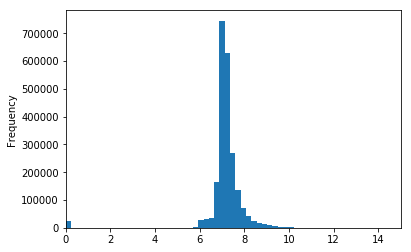

In [25]:
# Aplicando a transformação matemática para a correção da assimetria
df['log_salario'] = np.log1p(df['Salário Mensal'])
df['log_salario'].plot.hist(bins=50, xlim=(0, 15))

In [26]:
# Código para contagem dos valores da variável idade
df['Idade'].value_counts(dropna=False).nlargest(7)

21    92666
23    92231
22    91791
24    90018
20    89764
19    89009
25    87011
Name: Idade, dtype: int64

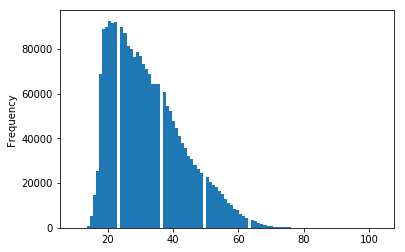

In [27]:
# Plotando um histograma para verificação dos valores da variável idade
# Distribuição de Idade
df.Idade.plot.hist(bins=100)

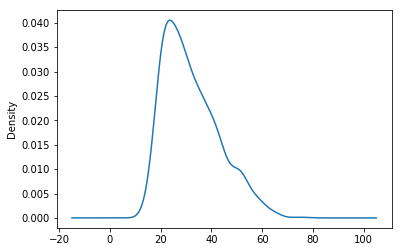

In [28]:
# Verificando o perfil da distribuição por um gráfico KDE (Kernel Density Estimate)

df['Idade'].sample(1000,random_state=23).plot.kde()

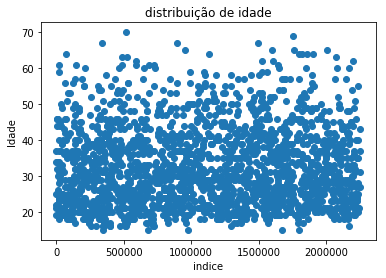

In [29]:
# Plotando um gráfico de dispersão da Idade

import matplotlib.pyplot as plt
 
sample = df.sample(2000)
# Plot
plt.scatter(y=sample['Idade'], x=sample['Idade'].index)
plt.title('distribuição de idade')
plt.xlabel('indice')
plt.ylabel('Idade')
plt.show()

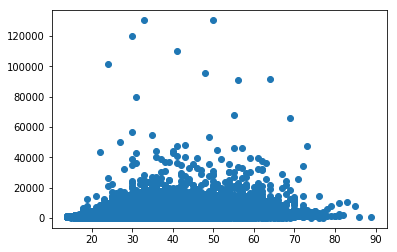

In [30]:
# Código para visualização da dispersão de Idade Vs. Salário Mensal
sample = df.sample(100000)
plt.scatter(x=sample['Idade'], y=sample['Salário Mensal'])

In [31]:
# Calculando a correlação entre Idade e Salário Mensal

from scipy.stats import pearsonr
pearson = pearsonr(df['Idade'], df['Salário Mensal'])
print(pearson[0])

0.15129436436275406


Pelo resultado, existe uma correlação de 0,15 entre Idade e Salário Mensal. Aparentemente, quanto maior a idade ocorre um ligeiro aumento de salário.

In [32]:
# Cálculo da correlação de Spearman por scipy.stats

from scipy.stats import spearmanr
spearman = spearmanr(df['Idade'], df['Salário Mensal'])
spearman[0]

0.2904966584873547

In [33]:
# Cálculo da correlação de Kendall por scipy.stats

from scipy.stats import kendalltau
tau = kendalltau(x=df['Idade'], y=df['Salário Mensal'])
tau[0]

0.20122711026750376

In [34]:
# Código para contagem dos valores da variável Grau de Instrução
df['Grau Instrução'].value_counts(dropna=False)

7    1273281
9     254463
6     201068
5     199478
4     123314
8      89178
2      60639
3      47147
1       8184
Name: Grau Instrução, dtype: int64

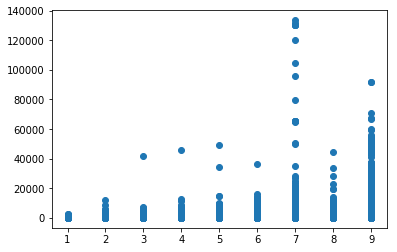

In [35]:
# Código para visualização da dispersão de Grau de Instrução Vs. Salário Mensal
sample = df.sample(100000)
plt.scatter(x=sample['Grau Instrução'], y=sample['Salário Mensal'])

In [36]:
# Calculando a correlação entre Grau de Instrução e Salário Mensal

from scipy.stats import pearsonr
pearson = pearsonr(df['Grau Instrução'], df['Salário Mensal'])
print(pearson[0])

0.18470180695812685


Pelo resultado, existe uma correlação de 0,18 entre Grau de Instrução e Salário Mensal.
Quanto maior o grau de instrução maiores os salários.

Nota: Não apareceu nenhum código 10 e 11 (MESTRADO e DOUTORADO) e nem -1 (IGNORADO)

In [37]:
df['Grau Instrução'] = df['Grau Instrução'].replace({1: 'Analfabeto',
                                                     2: 'Até 5ª Incompleto',
                                                     3: '5ª Completo Fundamental',
                                                     4: '6ª a 9ª Fundamental',
                                                     5: 'Fundamental Completo',
                                                     6: 'Médio Incompleto',
                                                     7: 'Médio Completo',
                                                     8: 'Superior Incompleto',
                                                     9: 'Superior Completo'})

df['Grau Instrução'] = df['Grau Instrução'].astype(object, errors='raise')
df['Grau Instrução'].value_counts(dropna=False)

Médio Completo             1273281
Superior Completo           254463
Médio Incompleto            201068
Fundamental Completo        199478
6ª a 9ª Fundamental         123314
Superior Incompleto          89178
Até 5ª Incompleto            60639
5ª Completo Fundamental      47147
Analfabeto                    8184
Name: Grau Instrução, dtype: int64

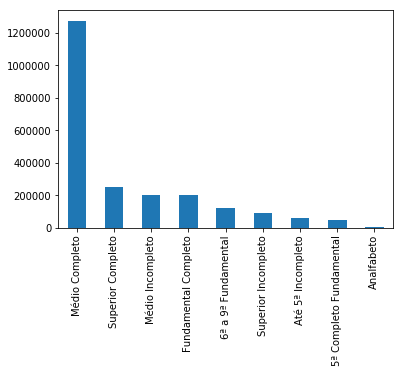

In [38]:
# Plotando um histograma para verificação dos valores da variável Grau de Instrução
# Distribuição de Grau de Instrução
df['Grau Instrução'].value_counts().plot(kind='bar')

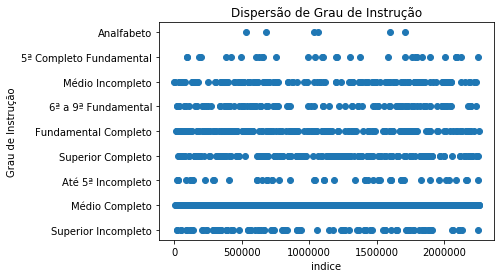

In [39]:
# Plotando um gráfico de dispersão do Grau de Instrução

import matplotlib.pyplot as plt
 
sample = df.sample(2000)
# Plot
plt.scatter(y=sample['Grau Instrução'], x=sample['Grau Instrução'].index)
plt.title('Dispersão de Grau de Instrução')
plt.xlabel('indice')
plt.ylabel('Grau de Instrução')
plt.show()

In [40]:
# Contado os valores da variável Sexo
# 1 - Masculino / 2 - Feminino

df['Sexo'].value_counts(dropna=False)

1    1323127
2     933625
Name: Sexo, dtype: int64

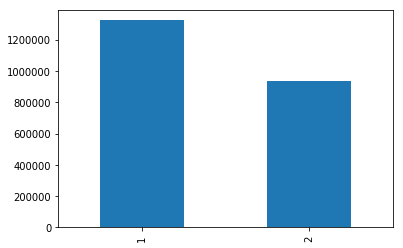

In [41]:
# Plotando um histograma com a distribuição dos valores Sexo

df.Sexo.value_counts().plot(kind='bar')

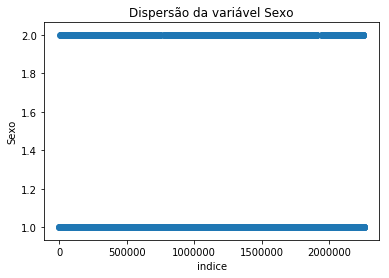

In [42]:
# Plotando um gráfico de dispersão da variável Sexo
import matplotlib.pyplot as plt
 
sample = df.sample(2000)
# Plot
plt.scatter(y=sample['Sexo'], x=sample['Sexo'].index)
plt.title('Dispersão da variável Sexo')
plt.xlabel('indice')
plt.ylabel('Sexo')
plt.show()

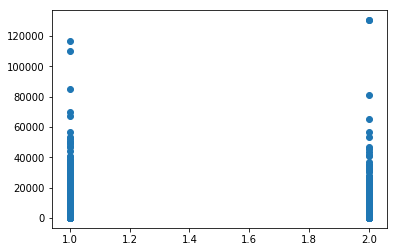

In [43]:
# Código para visualização da dispersão de Sexo Vs. Salário Mensal
sample = df.sample(100000)
plt.scatter(x=sample['Sexo'], y=sample['Salário Mensal'])

In [44]:
# Calculando a correlação entre Sexo e Salário Mensal

from scipy.stats import pearsonr
pearson = pearsonr(df['Sexo'], df['Salário Mensal'])
print(pearson[0])

-0.04239430463953994


Considerando que a variável Sexo é representada por 1 - Homem e 2 - Mulher, a correlação sugere uma pequena correlação negativa com o Salário Mensal, mostrando que possivelmente as mulheres ganham menos do que os homems.

In [45]:
df_homem = df[df['Sexo'] == 1]
df_mulher = df[df['Sexo'] == 2]

In [46]:
df_homem.shape

(1323127, 43)

In [47]:
df_mulher.shape

(933625, 43)

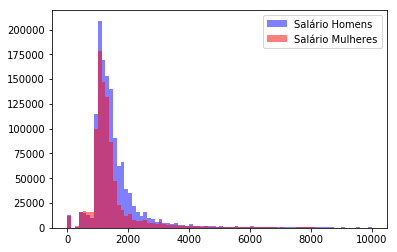

In [48]:
from matplotlib import pyplot

bins = 80

ax = pyplot.hist(df_homem['Salário Mensal'], bins, alpha=0.5, label='Salário Homens',color='blue', range=(0,10000))
ax = pyplot.hist(df_mulher['Salário Mensal'], bins, alpha=0.5, label='Salário Mulheres',color='red', range=(0,10000))

pyplot.legend(loc='upper right')
pyplot.show()

In [49]:
n_homem = len(df_homem['Salário Mensal'])
media_salario_homem = df_homem['Salário Mensal'].mean()
sigma_salario_homem = df_homem['Salário Mensal'].std()

print(media_salario_homem, sigma_salario_homem)

n_mulher = len(df_mulher['Salário Mensal'])
media_salario_mulher = df_mulher['Salário Mensal'].mean()
sigma_salario_mulher = df_mulher['Salário Mensal'].std()

print(media_salario_mulher, sigma_salario_mulher)

1701.9405272509744 2151.361529694141
1521.3851289329227 2014.0210612788167


NOTA -> Realizar teste de hipótese -> Inferência estatística pra verificar se os homens ganham mais que as mulheres

In [50]:
# Calculando o Intervalo de Confiança de 95% na amostra com filtro para homems
print(media_salario_homem - 1.96*sigma_salario_homem, 
      media_salario_homem + 1.96*sigma_salario_homem)

# Calculando o intervalo de confiança pelo Scipy.Stats
import scipy.stats as st
print(st.norm.interval(alpha=0.95, loc=media_salario_homem, scale=sigma_salario_homem))

# Hipótese -> homens ganham mais que as mulheres?
# Verificando se o valor médio de salário das mulheres "media_salario_mulher" é menor do que o limite inferior dos homens

# Isolando os limites de valor inferior e superior 
limite_inferior_homem = st.norm.interval(alpha=0.95, loc=media_salario_homem, scale=sigma_salario_homem)[0]
limite_superior_homem = st.norm.interval(alpha=0.95, loc=media_salario_homem, scale=sigma_salario_homem)[1]

# Comparando com a hipótese
print(media_salario_mulher)
media_salario_mulher < limite_inferior_homem

# False -> Mostra que as mulheres ganham estatisticamente igual aos homens

-2514.728070949542 5918.60912545149
(-2514.6505886745404, 5918.5316431764895)
1521.3851289329227


False

In [51]:
# Calculando o Intervalo de Confiança de 95% na amostra com filtro para mulheres
print(media_salario_mulher - 1.96*sigma_salario_mulher, 
      media_salario_mulher + 1.96*sigma_salario_mulher)

# Calculando o intervalo de confiança pelo Scipy.Stats
import scipy.stats as st
print(st.norm.interval(alpha=0.95, loc=media_salario_mulher, scale=sigma_salario_mulher))

# Hipótese -> homens ganham mais que as mulheres?
# Verificando se o valor médio de salário dos homens "media_salario_homem" é maior do que o limite superior das mulheres

# Isolando os limites de valor inferior e superior 
limite_inferior_mulher = st.norm.interval(alpha=0.95, loc=media_salario_mulher, scale=sigma_salario_mulher)[0]
limite_superior_mulher = st.norm.interval(alpha=0.95, loc=media_salario_mulher, scale=sigma_salario_mulher)[1]

# Comparando com a hipótese
print(media_salario_homem)
media_salario_homem > limite_superior_mulher

#False -> Mostra que as mulheres ganham estatisticamente igual aos homens

-2426.0961511735577 5468.866409039403
(-2426.023615278695, 5468.793873144541)
1701.9405272509744


False

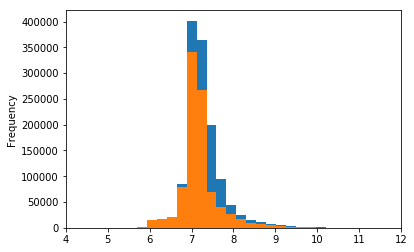

In [52]:
# Aplicando a transformação matemática para a correção da assimetria
df_homem['log_salario'] = np.log1p(df_homem['Salário Mensal'])
df_homem['log_salario'].plot.hist(bins=50, xlim=(4, 12))

df_mulher['log_salario'] = np.log1p(df_mulher['Salário Mensal'])
df_mulher['log_salario'].plot.hist(bins=50, xlim=(4, 12))

In [53]:
x1l = df_homem['log_salario']

x1mean = x1l.mean()
sigma1 = x1l.std()

x2l = df_mulher['log_salario']

x2mean = x2l.mean()
sigma2 = x2l.std()

print(x1mean, sigma1)
print(x2mean, sigma2)

7.207749199984176 0.8574065535920404
7.09361294462052 0.9141263023741233


In [54]:
# Calculando o Intervalo de Confiança de 95% na amostra com filtro para homems
# e considerando o dataframe onde foi aplicada a correção da assimetria via log 

print(x1mean - 1.96*sigma1, x1mean + 1.96*sigma1) # da tabela Z-Score: 0.95 / 2 = 0.4750 --> 1.96

# Calculando o intervalo de confiança pelo Scipy.Stats

import scipy.stats as st
print(st.norm.interval(alpha=0.95, loc=x1mean, scale=sigma1))

# Hipótese -> homens ganham mais que as mulheres?
# Verificando se o valor médio de salário das mulheres "x2mean" é menor do que o limite inferior dos homens
# (valor obtido do dataframe com log aplicado -> df_mulher['log_salario'])

# Isolando os limites de valor inferior e superior 
limite_inferior1 = st.norm.interval(alpha=0.95, loc=x1mean, scale=sigma1)[0]
limite_superior1 = st.norm.interval(alpha=0.95, loc=x1mean, scale=sigma1)[1]

# Comparando com a hipótese
print(x2mean)
x2mean < limite_inferior1

#False -> Mostra que as mulheres ganham estatisticamente igual aos homens

5.527232354943776 8.888266045024574
(5.527263234835164, 8.888235165133187)
7.09361294462052


False

In [55]:
# Calculando o Intervalo de Confiança de 95% na amostra com filtro para mulheres
# e considerando o dataframe onde foi aplicada a correção da assimetria via log 

print(x2mean - 1.96*sigma2, x2mean + 1.96*sigma2) # da tabela Z-Score: 0.95 / 2 = 0.4750 --> 1.96

# Calculando o intervalo de confiança pelo Scipy.Stats

import scipy.stats as st
print(st.norm.interval(alpha=0.95, loc=x2mean, scale=sigma2))

# Hipótese -> homens ganham mais que as mulheres?
# Verificando se o valor médio de salário dos homens "x1mean" é maior do que o limite inferior das mulheres
# (valor obtido do dataframe com log aplicado -> df_homem['log_salario'])

# Isolando os limites de valor inferior e superior 
limite_inferior2 = st.norm.interval(alpha=0.95, loc=x2mean, scale=sigma2)[0]
limite_superior2 = st.norm.interval(alpha=0.95, loc=x2mean, scale=sigma2)[1]

# Comparando com a hipótese
print(x1mean)
x1mean > limite_superior2

#False -> Mostra que as mulheres ganham estatisticamente igual aos homens

5.301925391967238 8.885300497273802
(5.301958314646467, 8.885267574594574)
7.207749199984176


False

In [56]:
df['Raça Cor'].value_counts(dropna=False)

2    979869
8    815848
9    306806
4    133648
6     11011
1      9570
Name: Raça Cor, dtype: int64

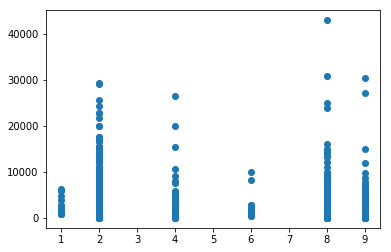

In [57]:
# Código para visualização da dispersão de Raça Cor Vs. Salário Mensal
sample = df.sample(10000)
plt.scatter(x=sample['Raça Cor'], y=sample['Salário Mensal'])

In [58]:
df['Raça Cor'] = df['Raça Cor'].replace({1: 'INDIGENA',
                                         2: 'BRANCA',
                                         4: 'PRETA',
                                         6: 'AMARELA',
                                         8: 'PARDA',
                                         9: 'NAO IDENT'})

df['Raça Cor'] = df['Raça Cor'].astype(object, errors='raise')
df['Raça Cor'].value_counts(dropna=False)

BRANCA       979869
PARDA        815848
NAO IDENT    306806
PRETA        133648
AMARELA       11011
INDIGENA       9570
Name: Raça Cor, dtype: int64

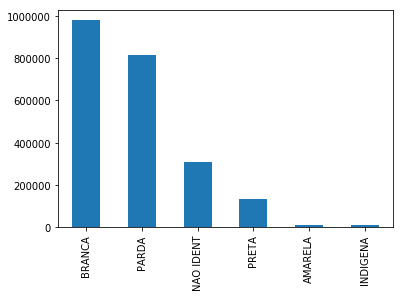

In [59]:
# Plotando um histograma para verificação dos valores de "Raça Cor"
df['Raça Cor'].value_counts().plot(kind='bar')

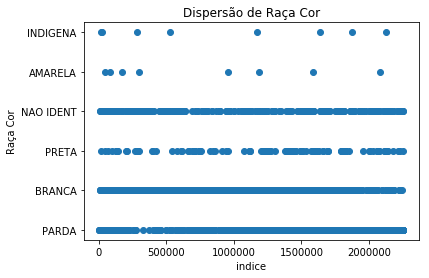

In [60]:
# Plotando um gráfico de dispersão do Grau de Instrução

import matplotlib.pyplot as plt
 
sample = df.sample(2000)
# Plot
plt.scatter(y=sample['Raça Cor'], x=sample['Raça Cor'].index)
plt.title('Dispersão de Raça Cor')
plt.xlabel('indice')
plt.ylabel('Raça Cor')
plt.show()

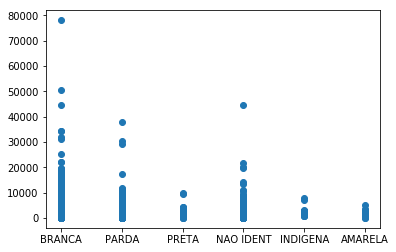

In [61]:
# Código para visualização da dispersão de Raça Cor Vs. Salário Mensal
sample = df.sample(10000)
plt.scatter(x=sample['Raça Cor'], y=sample['Salário Mensal'])

Difícil calcular uma correlação entre uma variável qualitativa nominal (Raça Cor) e uma variável quantitativa contínua (Salário Mensal).

In [62]:
df_indigena = df[df['Raça Cor'] == 'INDIGENA']
df_branca = df[df['Raça Cor'] == 'BRANCA']
df_preta = df[df['Raça Cor'] == 'PRETA']
df_amarela = df[df['Raça Cor'] == 'AMARELA']
df_parda = df[df['Raça Cor'] == 'PARDA']
df_cor_nao_ident = df[df['Raça Cor'] == 'NAO IDENT']

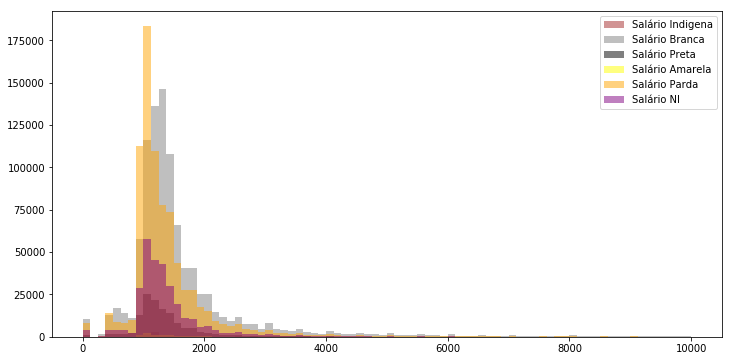

In [63]:
from matplotlib import pyplot

bins = 80
pyplot.figure(figsize=(12,6))

ax = pyplot.hist(df_indigena['Salário Mensal'], bins, alpha=0.5, label='Salário Indigena',color='brown', range=(0,10000))
ax = pyplot.hist(df_branca['Salário Mensal'], bins, alpha=0.5, label='Salário Branca',color='gray', range=(0,10000))
ax = pyplot.hist(df_preta['Salário Mensal'], bins, alpha=0.5, label='Salário Preta',color='black', range=(0,10000))
ax = pyplot.hist(df_amarela['Salário Mensal'], bins, alpha=0.5, label='Salário Amarela',color='yellow', range=(0,10000))
ax = pyplot.hist(df_parda['Salário Mensal'], bins, alpha=0.5, label='Salário Parda',color='orange', range=(0,10000))
ax = pyplot.hist(df_cor_nao_ident['Salário Mensal'], bins, alpha=0.5, label='Salário NI',color='purple', range=(0,10000))

pyplot.legend(loc='upper right')
pyplot.show()

In [64]:
media_salario_indigena = df_indigena['Salário Mensal'].mean()
media_salario_branca = df_branca['Salário Mensal'].mean()
media_salario_preta = df_preta['Salário Mensal'].mean()
media_salario_amarela = df_amarela['Salário Mensal'].mean()
media_salario_parda = df_parda['Salário Mensal'].mean()
media_salario_cor_nao_ident = df_cor_nao_ident['Salário Mensal'].mean()

sigma_salario_indigena = df_indigena['Salário Mensal'].std()
sigma_salario_branca = df_branca['Salário Mensal'].std()
sigma_salario_preta = df_preta['Salário Mensal'].std()
sigma_salario_amarela = df_amarela['Salário Mensal'].std()
sigma_salario_parda = df_parda['Salário Mensal'].std()
sigma_salario_cor_nao_ident = df_cor_nao_ident['Salário Mensal'].std()

print(media_salario_indigena, sigma_salario_indigena)
print(media_salario_branca, sigma_salario_branca)
print(media_salario_preta, sigma_salario_preta)
print(media_salario_amarela, sigma_salario_amarela)
print(media_salario_parda, sigma_salario_parda)
print(media_salario_cor_nao_ident, sigma_salario_cor_nao_ident)

1767.2401253918495 1818.4308122946436
1824.9111422037026 2674.379264704636
1451.7972360229858 1548.4499348100017
2111.330215239306 3436.4852173121126
1459.304827614948 1425.2392603499848
1497.2058303944511 1518.839953515303


Realizar teste de hipótese -> Inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

In [65]:
# Calculando o Intervalo de Confiança de 95% na amostra com filtro para homems
print(media_salario_branca - 1.96*sigma_salario_branca, 
      media_salario_branca + 1.96*sigma_salario_branca)

# Calculando o intervalo de confiança pelo Scipy.Stats
import scipy.stats as st
limites_branca = st.norm.interval(
    alpha=0.95, loc=media_salario_branca, scale=sigma_salario_branca)
print(limites_branca)

# Hipótese -> brancos ganham mais que os outros grupos étnicos?

# Isolando os limites de valor inferior e superior 
limite_inferior_branca = limites_branca[0]
limite_superior_branca = limites_branca[1]

# Comparando com a hipótese
print()
print('media_salario_indigena', media_salario_indigena, media_salario_indigena < limite_inferior_branca)
print('media_salario_preta', media_salario_preta, media_salario_preta < limite_inferior_branca)
print('media_salario_amarela', media_salario_amarela, media_salario_amarela < limite_inferior_branca)
print('media_salario_parda', media_salario_parda, media_salario_parda < limite_inferior_branca)

-3416.8722166173843 7066.694501024789
(-3416.775897618096, 7066.598182025502)

media_salario_indigena 1767.2401253918495 False
media_salario_preta 1451.7972360229858 False
media_salario_amarela 2111.330215239306 False
media_salario_parda 1459.304827614948 False


In [66]:
# Calculando o Intervalo de Confiança de 95% na amostra com filtro para os outros grupos étnicos
limites_indigena = st.norm.interval(alpha=0.95, loc=media_salario_indigena, scale=sigma_salario_indigena)
limites_preta = st.norm.interval(alpha=0.95, loc=media_salario_preta, scale=sigma_salario_preta)
limites_amarela = st.norm.interval(alpha=0.95, loc=media_salario_amarela, scale=sigma_salario_amarela)
limites_parda = st.norm.interval(alpha=0.95, loc=media_salario_parda, scale=sigma_salario_parda)

# Hipótese -> brancos ganham mais que os outros grupos étnicos?

# Comparando com a hipótese
print('media_salario_branca', media_salario_branca)
print()
print('limites_indigena', limites_indigena, media_salario_branca > limites_indigena[1])
print('limites_preta', limites_preta, media_salario_branca > limites_preta[1])
print('limites_amarela', limites_amarela, media_salario_branca > limites_amarela[1])
print('limites_parda', limites_parda, media_salario_branca > limites_parda[1])

media_salario_branca 1824.9111422037026

limites_indigena (-1796.8187750835675, 5331.299025867266) False
limites_preta (-1583.108868068012, 4486.703340113983) False
limites_amarela (-4624.057044096736, 8846.717474575347) False
limites_parda (-1334.1127920235276, 4252.7224472534235) False


Conclusão: Os brancos não ganham mais do que os outros grupos étnicos.

NOTA -> Elaborar uma hipótese para ser rejeitada ou não-rejeitada de acordo com o resultado da análise através da utilização dos dados do CAJED considerando as suas colunas.

In [67]:
corr = df.corr().round(2)

In [68]:
corr.head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Qtd Hora Contrat,...,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Regiões Adm DF,Mesorregião,Microrregião,Ind Trab Parcial,Ind Trab Intermitente,log_salario
Admitidos/Desligados,1.00,NaN,0.01,NaN,0.01,-0.05,-0.05,-0.05,0.06,-0.06,...,0.04,-0.0,0.25,0.01,0.00,0.01,0.01,0.00,-0.05,0.02
Competência Declarada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Município,0.01,NaN,1.00,NaN,0.01,-0.03,-0.02,-0.02,-0.01,0.00,...,0.01,-0.0,-0.02,1.00,0.02,1.00,1.00,-0.03,-0.01,0.06
Ano Declarado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBO 2002 Ocupação,0.01,NaN,0.01,NaN,1.00,-0.43,-0.44,-0.44,-0.03,0.22,...,0.10,-0.0,-0.00,0.01,-0.00,0.01,0.01,-0.04,0.01,-0.05


In [69]:
del corr['Competência Declarada']
del corr['Ano Declarado']
corr = corr.drop(['Competência Declarada', 'Ano Declarado'])

In [70]:
corr.head()

,Admitidos/Desligados,Município,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Qtd Hora Contrat,IBGE Subsetor,Idade,...,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Regiões Adm DF,Mesorregião,Microrregião,Ind Trab Parcial,Ind Trab Intermitente,log_salario
Admitidos/Desligados,1.00,0.01,0.01,-0.05,-0.05,-0.05,0.06,-0.06,-0.01,0.11,...,0.04,-0.0,0.25,0.01,0.00,0.01,0.01,0.00,-0.05,0.02
Município,0.01,1.00,0.01,-0.03,-0.02,-0.02,-0.01,0.00,0.02,-0.01,...,0.01,-0.0,-0.02,1.00,0.02,1.00,1.00,-0.03,-0.01,0.06
CBO 2002 Ocupação,0.01,0.01,1.00,-0.43,-0.44,-0.44,-0.03,0.22,-0.29,0.05,...,0.10,-0.0,-0.00,0.01,-0.00,0.01,0.01,-0.04,0.01,-0.05
CNAE 1.0 Classe,-0.05,-0.03,-0.43,1.00,0.96,0.96,0.05,-0.20,0.36,0.02,...,-0.35,0.0,-0.03,-0.03,0.00,-0.03,-0.03,0.04,0.00,0.01
CNAE 2.0 Classe,-0.05,-0.02,-0.44,0.96,1.00,1.00,0.07,-0.22,0.41,0.03,...,-0.32,-0.0,-0.02,-0.03,0.00,-0.02,-0.02,0.04,0.00,-0.00


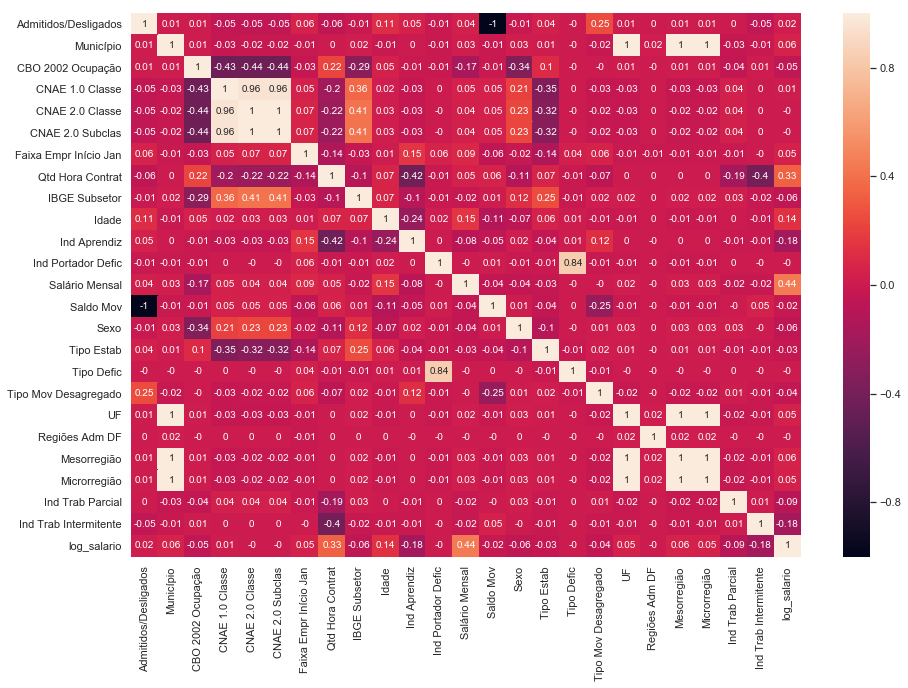

In [71]:
# plote um SEABORN heatmap com todas as correlações das variávies numéricas entre si.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set()

plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, annot=True, annot_kws={"size": 10})

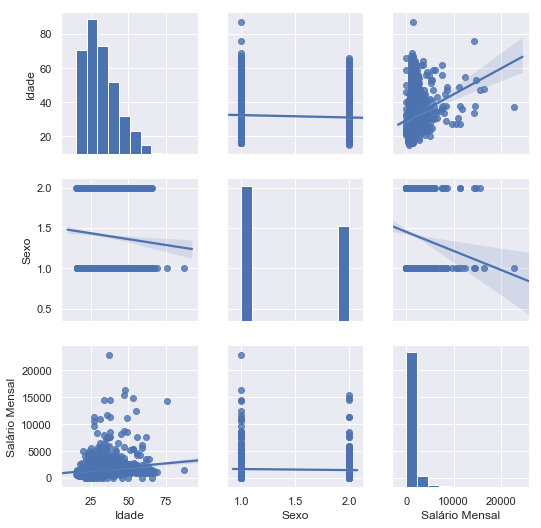

In [72]:
df_sample = pd.DataFrame({'Idade':df['Idade'], 'Sexo':df['Sexo'], 'Salário Mensal':df['Salário Mensal']}).sample(2000)

import seaborn as sns
sns.pairplot(df_sample, vars=['Idade', 'Sexo', 'Salário Mensal'],
                 kind='reg')  


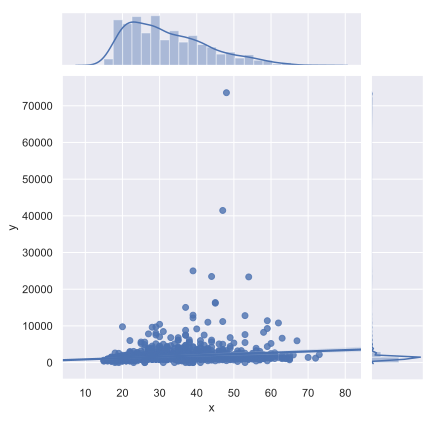

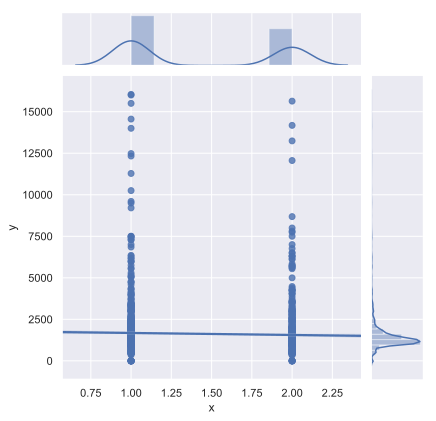

In [73]:
import scipy.stats as ss
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

%matplotlib inline
%config InlineBackend.figure_formats=['svg']

df1 = pd.DataFrame({'Idade':df['Idade'], 'Salário Mensal':df['Salário Mensal']})
lista1 = random.sample(df1.values.tolist(), k=2000)
df1 = pd.DataFrame(lista1, columns=['x','y'])

df2 = pd.DataFrame({'Sexo':df['Sexo'], 'Salário Mensal':df['Salário Mensal']})
lista2 = random.sample(df2.values.tolist(), k=2000)
df2 = pd.DataFrame(lista2, columns=['x','y'])

sns.set(color_codes=True)
sns.jointplot(x='x', y='y', data=df1, kind='reg')
sns.jointplot(x='x', y='y', data=df2, kind='reg')